In [ ]:
# IMPORTANDO BIBLIOTECAS BÁSICA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LEER DATOS
data = pd.read_csv("train.csv")
data.head()

,id,date,country,store,product,num_sold
0,0,2017-01-01,Chile,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Chile,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Chile,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Chile,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Chile,Kaggle Learn,Using LLMs to Write Better,49


**DATA ANALYSIS AND PREPROCESSING**

In [3]:
# CREANDO UNA FUNCIÓN PARA EXPLORAR LOS DATOS USANDO ESTADÍSTICAS DESCRIPTIVAS BÁSICAS

def explore(data):
    
    print("Forma de los datos:", data.shape,"\n")
    print("Descripción de los datos:")
    desc = pd.DataFrame(index = list(data))
    desc['count'] = data.count()
    desc['null'] = data.isnull().sum()
    desc['type'] = data.dtypes
    desc = pd.concat([desc, data.describe().T.drop('count', axis = 1)], axis = 1)
    return desc
    
explore(data)

Forma de los datos: (136950, 6) 

Descripción de los datos:


,count,null,type,mean,std,min,25%,50%,75%,max
id,136950,0,int64,68474.500000,39534.204020,0.0,34237.25,68474.5,102711.75,136949.0
date,136950,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,136950,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store,136950,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,136950,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_sold,136950,0,int64,165.522636,183.691575,2.0,46.00,98.0,184.00,1380.0


In [4]:
# GETTING NO. OF UNIQUE IN EACH COL.

data.nunique()

id          136950
date          1826
country          5
store            3
product          5
num_sold      1028
dtype: int64

In [5]:
# ADDING BASIC DATETIME COLS AND PERFORMING BASIC PREPROCESSING OF THE DATA

def basic_process(data):
    
    #data.drop('id', axis = 1, inplace = True)
    data = data.rename({'date':'Date'}, axis = 1)
    data['Date'] = pd.to_datetime(data['Date'])
    data['Day'] = data['Date'].dt.day
    data['Week'] = data['Date'].dt.week
    data['Month'] = data['Date'].dt.month
    data['Year'] = data['Date'].dt.year
    data.set_index('Date', inplace = True)
    
    return data
    
data = basic_process(data)
data.head()

,id,country,store,product,num_sold,Day,Week,Month,Year
Date,,,,,,,,,
2017-01-01,0,Chile,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,52,1,2017
2017-01-01,1,Chile,Kaggle Learn,Using LLMs to Train More LLMs,66,1,52,1,2017
2017-01-01,2,Chile,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,52,1,2017
2017-01-01,3,Chile,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,52,1,2017
2017-01-01,4,Chile,Kaggle Learn,Using LLMs to Write Better,49,1,52,1,2017


In [6]:
data


,id,country,store,product,num_sold,Day,Week,Month,Year
Date,,,,,,,,,
2017-01-01,0,Chile,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,52,1,2017
2017-01-01,1,Chile,Kaggle Learn,Using LLMs to Train More LLMs,66,1,52,1,2017
2017-01-01,2,Chile,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,52,1,2017
2017-01-01,3,Chile,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,52,1,2017
2017-01-01,4,Chile,Kaggle Learn,Using LLMs to Write Better,49,1,52,1,2017
...,...,...,...,...,...,...,...,...,...
2021-12-31,136945,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,31,52,12,2021
2021-12-31,136946,Spain,Kagglazon,Using LLMs to Train More LLMs,752,31,52,12,2021
2021-12-31,136947,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,31,52,12,2021


In [7]:
# Encontrar el número de valores atípicos en la columna 'num_sold'

q1 = np.percentile(data['num_sold'], 25)
q3 = np.percentile(data['num_sold'], 75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = [val for val in data['num_sold'] if val < lower_bound or val > upper_bound]

len(outliers)

18906

In [8]:
# a medida que el número de valores atípicos es muy alto, se puede usar la mediana para reemplazar estos valores atípicos

lower_threshold = np.percentile(data['num_sold'], 5)
upper_threshold = np.percentile(data['num_sold'], 95)
median = np.median(data['num_sold'])

data['num_sold'] = np.where((data['num_sold'] < lower_threshold) | (data['num_sold'] > upper_threshold),median,data['num_sold'])
data['num_sold']

Date
2017-01-01     63.0
2017-01-01     66.0
2017-01-01     98.0
2017-01-01     59.0
2017-01-01     49.0
              ...  
2021-12-31     98.0
2021-12-31     98.0
2021-12-31    111.0
2021-12-31     98.0
2021-12-31    539.0
Name: num_sold, Length: 136950, dtype: float64

In [9]:
# creando columnas de promedio móvil

data['Avg_Weekly_Sale'] = data['num_sold'].rolling(window=7, min_periods=1).mean()
data['Avg_Monthly_Sale'] = data['num_sold'].rolling(window=30, min_periods=1).mean()

In [10]:
# chequeo de valores nulos

print(data['Year'].unique())
print(data['country'].unique())
print(data['product'].unique())

[2017 2018 2019 2020 2021]
['Chile' 'Canada' 'Estonia' 'Japan' 'Spain']
['Using LLMs to Improve Your Coding' 'Using LLMs to Train More LLMs'
 'Using LLMs to Win Friends and Influence People'
 'Using LLMs to Win More Kaggle Competitions' 'Using LLMs to Write Better']


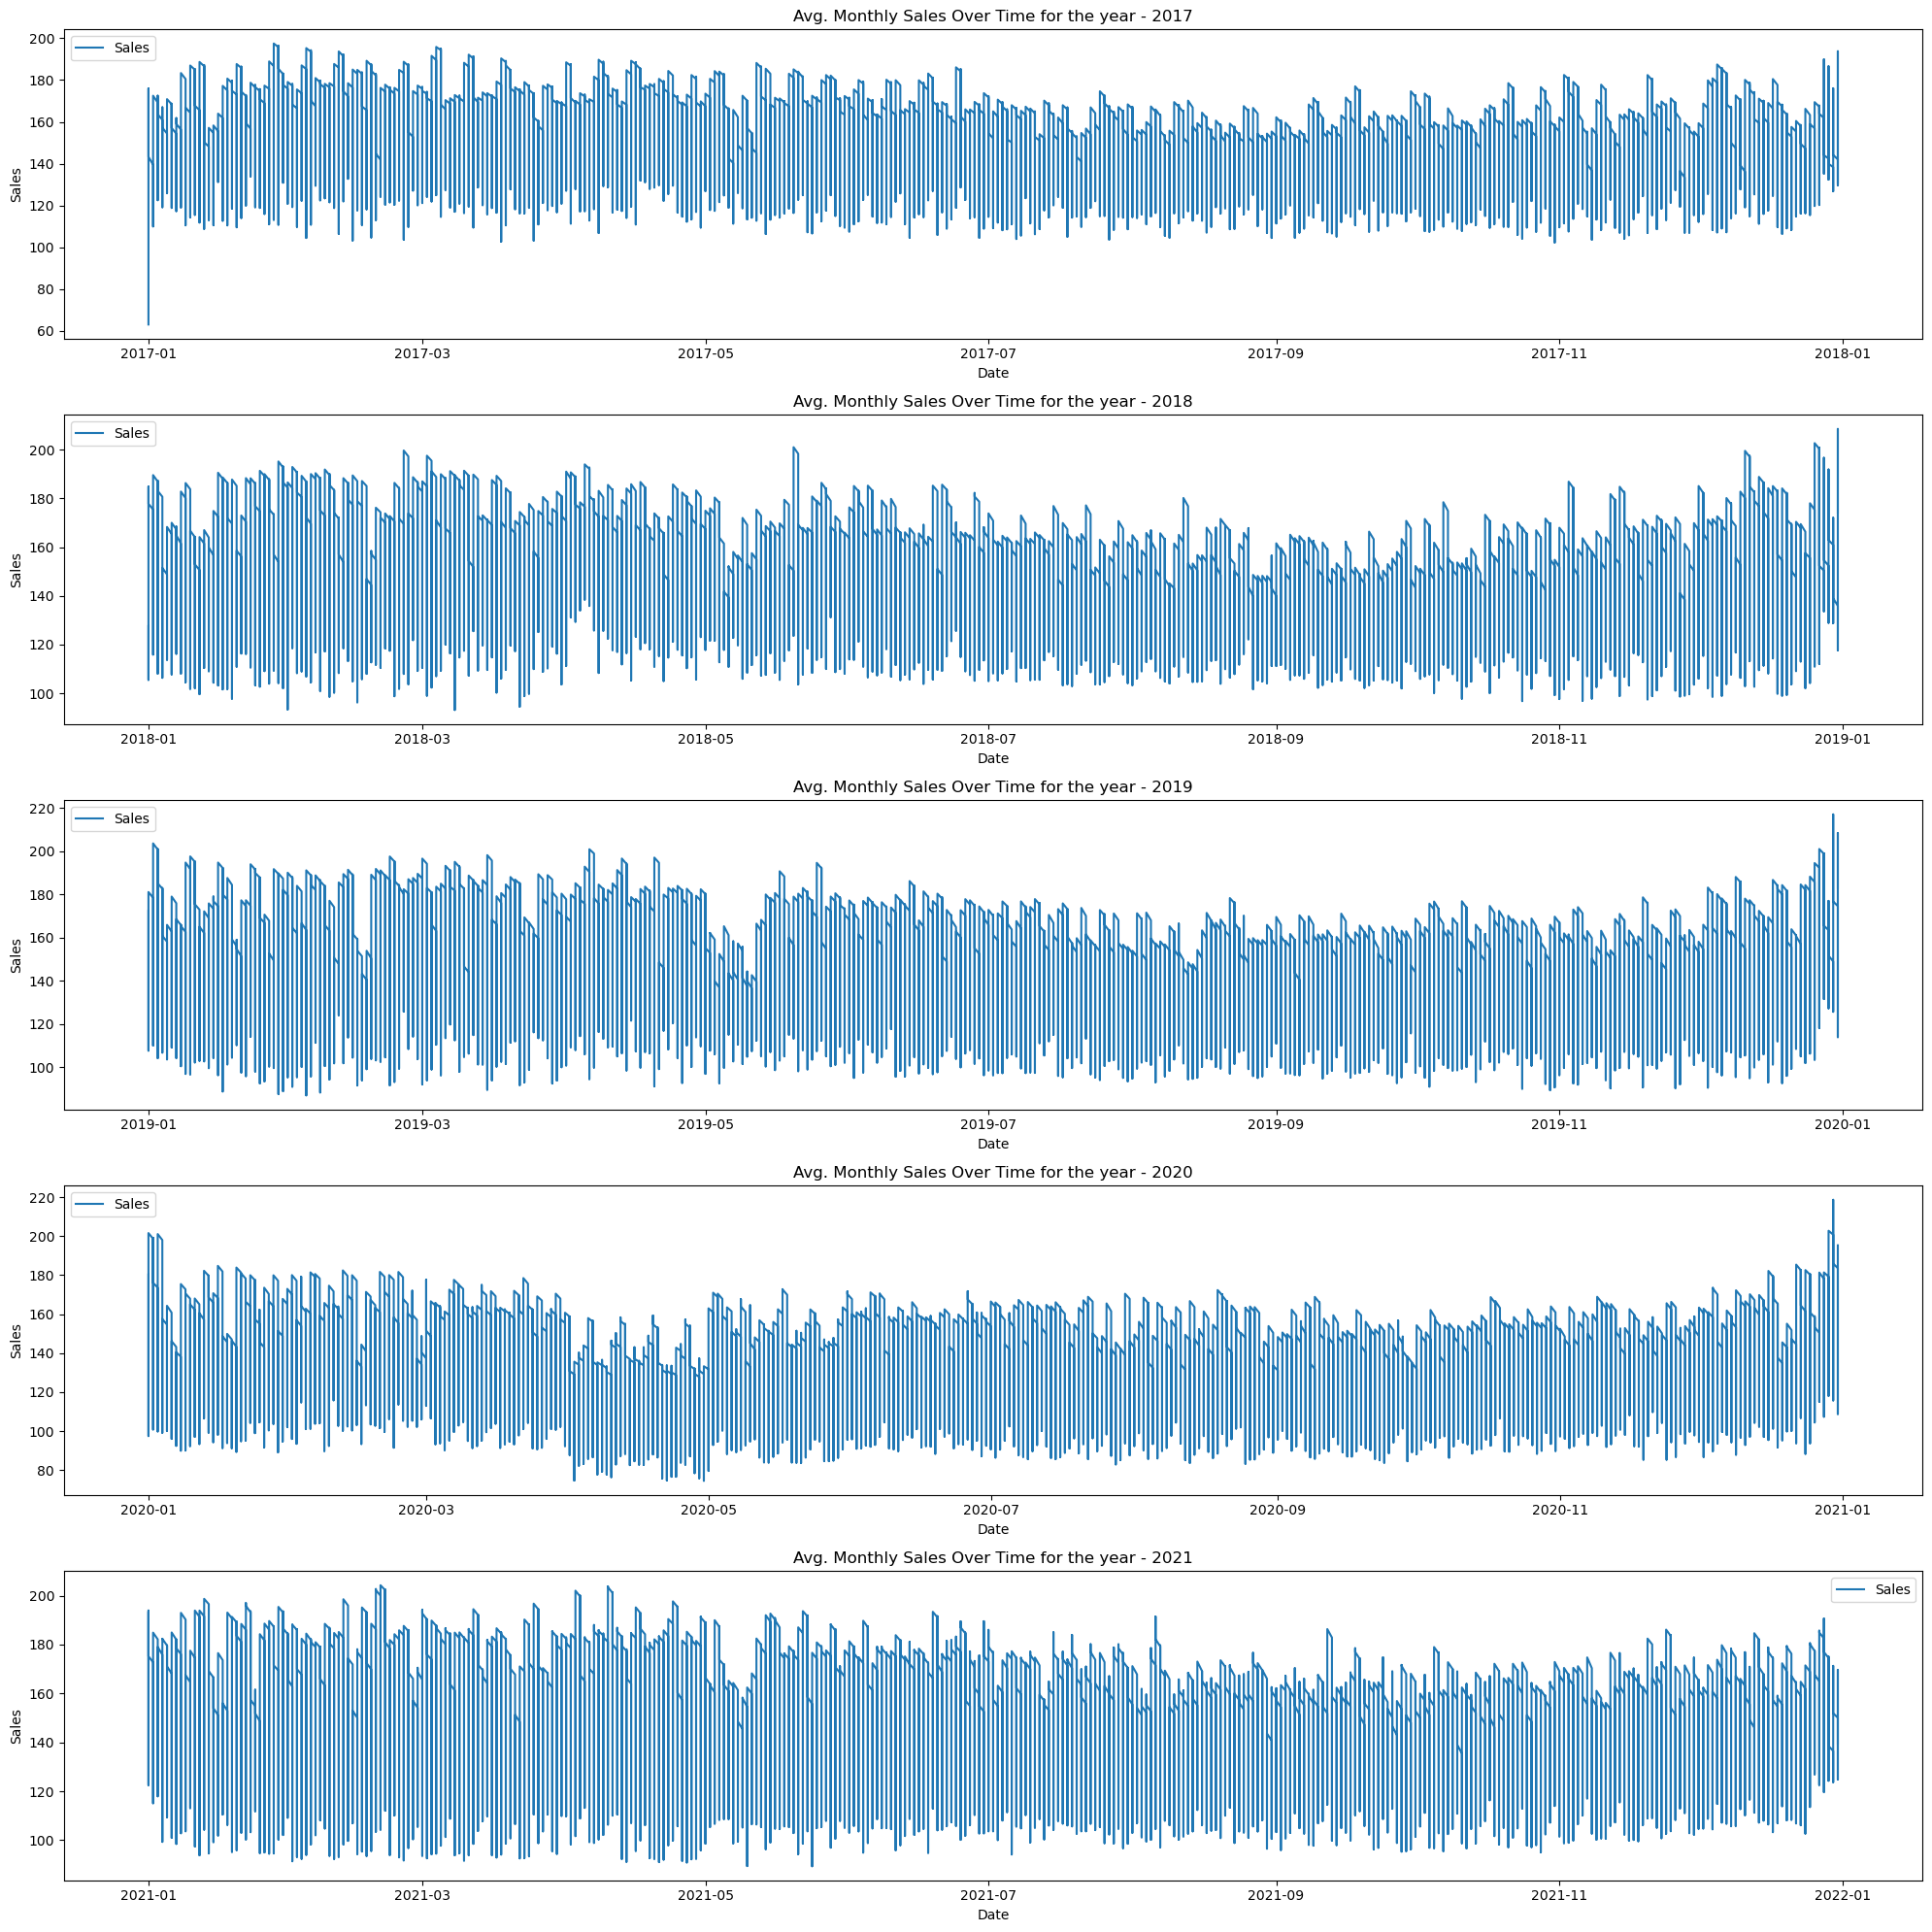

In [11]:
# visualización de las ventas promedio mensuales a lo largo del tiempo

yearly = data.groupby('Year')['Avg_Monthly_Sale']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 20))

for i, yr in enumerate([2017, 2018, 2019, 2020, 2021]):
    ax = axes[i]
    ax.plot(yearly.get_group(yr), label='Sales')
    ax.set_title(f'Avg. Monthly Sales Over Time for the year - {yr}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')
    ax.legend()

plt.tight_layout()

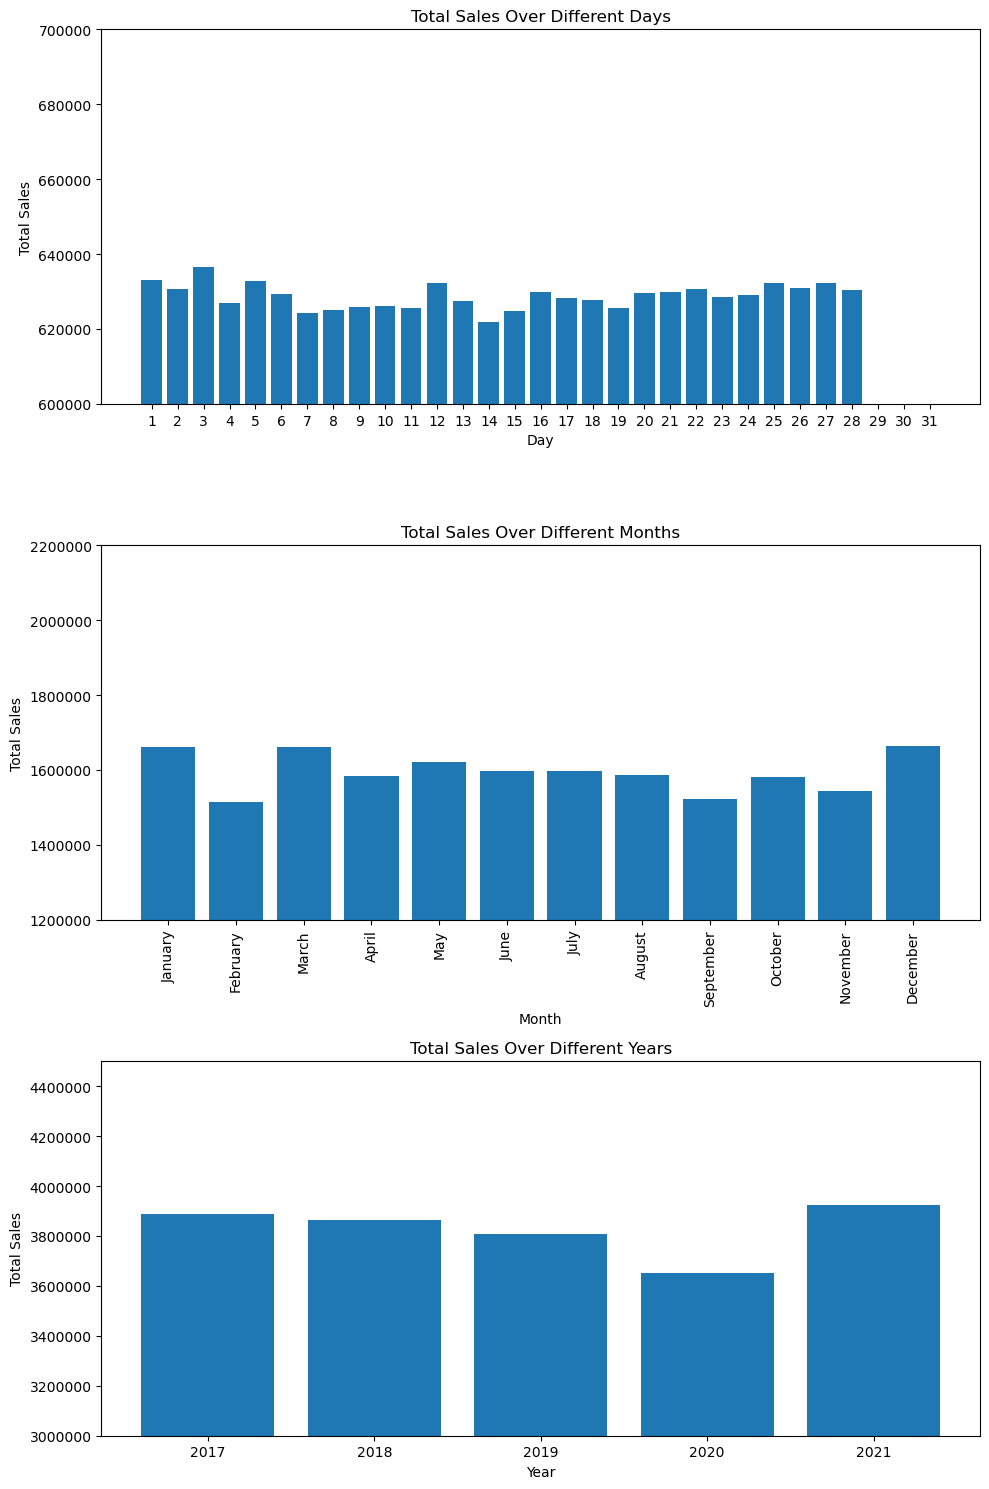

In [12]:
# visualización de las ventas promedio semanales a lo largo del tiempo

import calendar

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

ax1 = axes[0]
days = sorted(data['Day'].unique())
ax1.bar(days, data.groupby('Day')['num_sold'].sum())
ax1.set_title('Total Sales Over Different Days')
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Sales')
ax1.set_xticks(days)
ax1.set_ylim([600000, 700000])

ax2 = axes[1]
months = [calendar.month_name[i] for i in range(1, 13)]
ax2.bar(range(1, 13), data.groupby('Month')['num_sold'].sum())
ax2.set_title('Total Sales Over Different Months')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Sales')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(months, rotation='vertical')
ax2.ticklabel_format(style='plain', axis='y')
ax2.set_ylim([1200000, 2200000])

ax3 = axes[2]
ax3.bar(data['Year'].unique(), data.groupby('Year')['num_sold'].sum())
ax3.set_title('Total Sales Over Different Years')
ax3.set_xlabel('Year')
ax3.set_ylabel('Total Sales')
ax3.ticklabel_format(style='plain', axis='y')
ax3.set_ylim([3000000, 4500000])

plt.tight_layout()
plt.show()

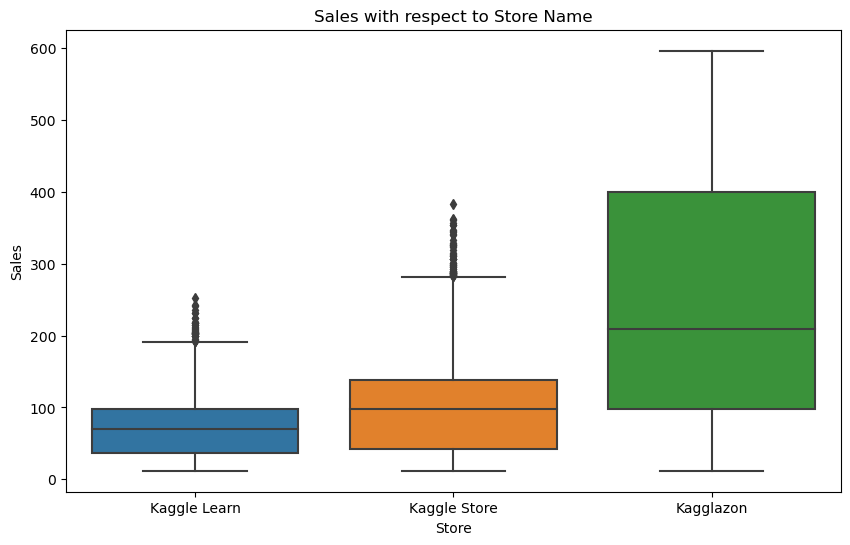

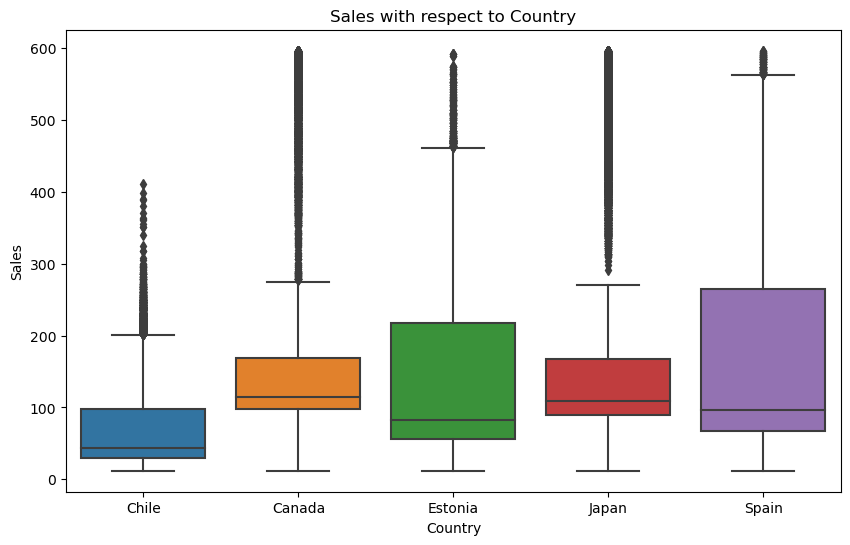

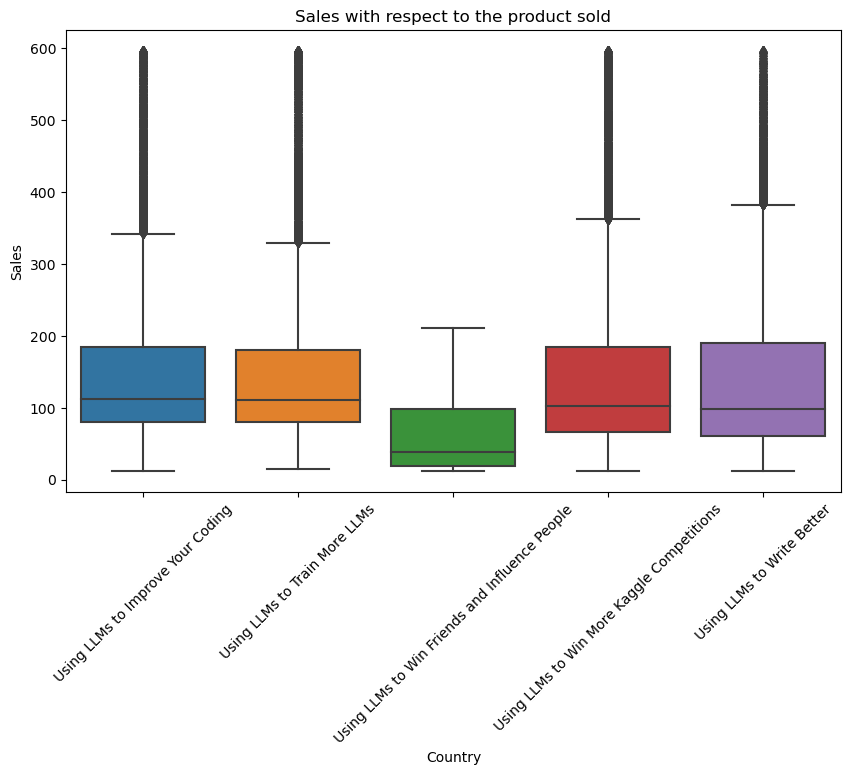

In [32]:
# creando un gráfico de caja para visualizar las ventas con respecto a las diferentes columnas categóricas

plt.figure(figsize=(10, 6))
sns.boxplot(x='store', y='num_sold', data= data)
plt.title('Sales with respect to Store Name')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='num_sold', data= data)
plt.title('Sales with respect to Country')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='product', y='num_sold', data= data)
plt.title('Sales with respect to the product sold')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.show()

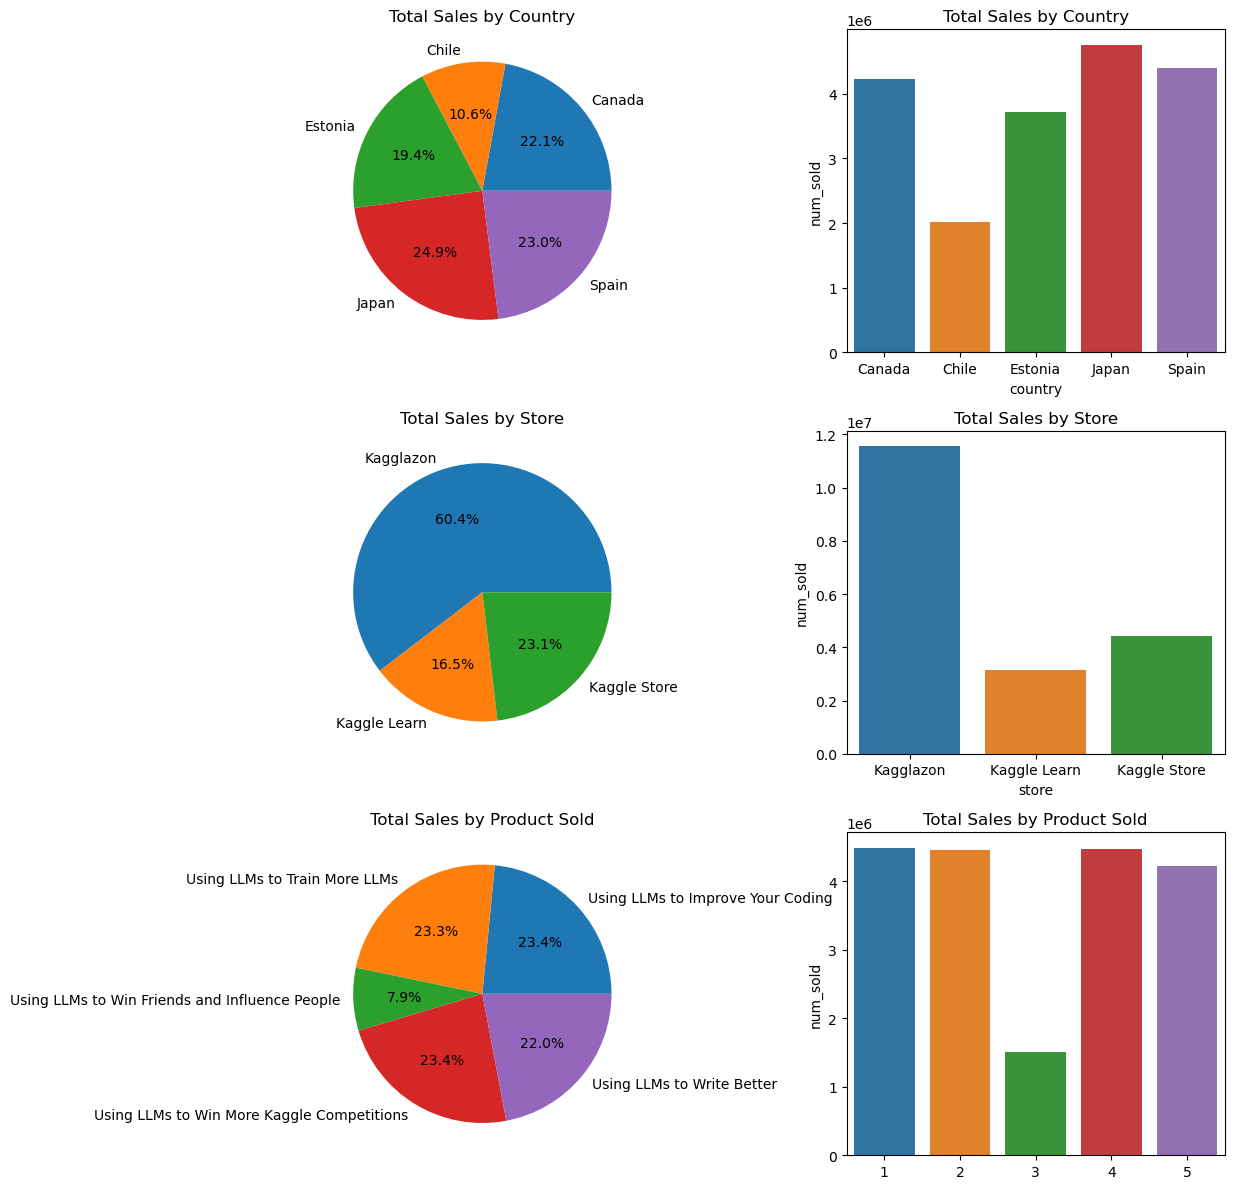

In [14]:
import seaborn as sns

total_sales_country = data.groupby('country')['num_sold'].sum()
total_sales_store = data.groupby('store')['num_sold'].sum()
total_sales_product = data.groupby('product')['num_sold'].sum()

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].set_title('Total Sales by Country')
axes[0, 0].pie(total_sales_country, labels=total_sales_country.index, autopct='%1.1f%%')
axes[0, 1].set_title('Total Sales by Country')
sns.barplot(x=total_sales_country.index, y=total_sales_country, ax=axes[0, 1])

axes[1, 0].set_title('Total Sales by Store')
axes[1, 0].pie(total_sales_store, labels=total_sales_store.index, autopct='%1.1f%%')
axes[1, 1].set_title('Total Sales by Store')
sns.barplot(x=total_sales_store.index, y=total_sales_store, ax=axes[1, 1])

axes[2, 0].set_title('Total Sales by Product Sold')
axes[2, 0].pie(total_sales_product, labels=total_sales_product.index, autopct='%1.1f%%')
axes[2, 1].set_title('Total Sales by Product Sold')
sns.barplot(x=[1,2,3,4,5], y=total_sales_product, ax=axes[2, 1])

plt.tight_layout()
plt.show()

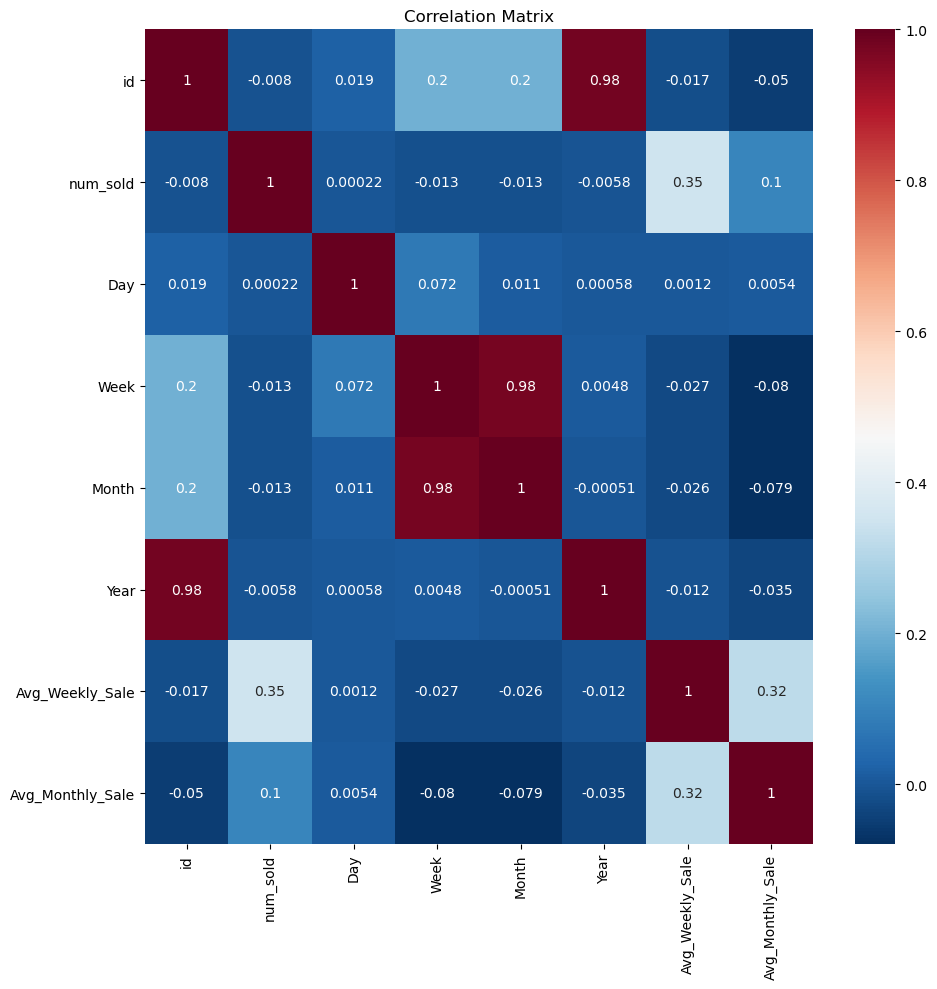

In [15]:
# creando un gráfico de correlación para visualizar la relación entre las diferentes columnas

corr_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

**FEATURE ENGINEERING AND SELECTION**

In [16]:
# feature engineering para capturar más información de las columnas de fecha

data['Quarter'] = data['Month'].apply(lambda x: (x-1)//3 + 1)
data['Day_of_Year'] = data['Month'] * 30 + data['Day']
data['Weekday'] = pd.to_datetime(data['Day'].astype(str) + '-' + data['Month'].astype(str) + '-' + data['Year'].astype(str)).dt.day_name()
data['Is_Weekend'] = data['Weekday'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

data.head()

,id,country,store,product,num_sold,Day,Week,Month,Year,Avg_Weekly_Sale,Avg_Monthly_Sale,Quarter,Day_of_Year,Weekday,Is_Weekend
Date,,,,,,,,,,,,,,,
2017-01-01,0,Chile,Kaggle Learn,Using LLMs to Improve Your Coding,63.0,1,52,1,2017,63.000000,63.000000,1,31,Sunday,1
2017-01-01,1,Chile,Kaggle Learn,Using LLMs to Train More LLMs,66.0,1,52,1,2017,64.500000,64.500000,1,31,Sunday,1
2017-01-01,2,Chile,Kaggle Learn,Using LLMs to Win Friends and Influence People,98.0,1,52,1,2017,75.666667,75.666667,1,31,Sunday,1
2017-01-01,3,Chile,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59.0,1,52,1,2017,71.500000,71.500000,1,31,Sunday,1
2017-01-01,4,Chile,Kaggle Learn,Using LLMs to Write Better,49.0,1,52,1,2017,67.000000,67.000000,1,31,Sunday,1


In [17]:
# separando las columnas de características y la columna de destino

x = data.drop(['num_sold'],axis=1)
y = data['num_sold']

x.head()

,id,country,store,product,Day,Week,Month,Year,Avg_Weekly_Sale,Avg_Monthly_Sale,Quarter,Day_of_Year,Weekday,Is_Weekend
Date,,,,,,,,,,,,,,
2017-01-01,0,Chile,Kaggle Learn,Using LLMs to Improve Your Coding,1,52,1,2017,63.000000,63.000000,1,31,Sunday,1
2017-01-01,1,Chile,Kaggle Learn,Using LLMs to Train More LLMs,1,52,1,2017,64.500000,64.500000,1,31,Sunday,1
2017-01-01,2,Chile,Kaggle Learn,Using LLMs to Win Friends and Influence People,1,52,1,2017,75.666667,75.666667,1,31,Sunday,1
2017-01-01,3,Chile,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,1,52,1,2017,71.500000,71.500000,1,31,Sunday,1
2017-01-01,4,Chile,Kaggle Learn,Using LLMs to Write Better,1,52,1,2017,67.000000,67.000000,1,31,Sunday,1


In [18]:
# deshacerse de las columnas de fecha y las columnas de ventas promedio

x = x.drop(['Avg_Weekly_Sale', 'Avg_Monthly_Sale'], axis = 1)
x.head()

,id,country,store,product,Day,Week,Month,Year,Quarter,Day_of_Year,Weekday,Is_Weekend
Date,,,,,,,,,,,,
2017-01-01,0,Chile,Kaggle Learn,Using LLMs to Improve Your Coding,1,52,1,2017,1,31,Sunday,1
2017-01-01,1,Chile,Kaggle Learn,Using LLMs to Train More LLMs,1,52,1,2017,1,31,Sunday,1
2017-01-01,2,Chile,Kaggle Learn,Using LLMs to Win Friends and Influence People,1,52,1,2017,1,31,Sunday,1
2017-01-01,3,Chile,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,1,52,1,2017,1,31,Sunday,1
2017-01-01,4,Chile,Kaggle Learn,Using LLMs to Write Better,1,52,1,2017,1,31,Sunday,1


In [19]:
# hacer label encoding en las columnas categóricas

from sklearn.preprocessing import LabelEncoder

def encode(data, cols):
    for col in cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    return data

categ_cols = ['product', 'store','country', 'Weekday']
x = encode(x, categ_cols)
x.head()

,id,country,store,product,Day,Week,Month,Year,Quarter,Day_of_Year,Weekday,Is_Weekend
Date,,,,,,,,,,,,
2017-01-01,0,1,1,0,1,52,1,2017,1,31,3,1
2017-01-01,1,1,1,1,1,52,1,2017,1,31,3,1
2017-01-01,2,1,1,2,1,52,1,2017,1,31,3,1
2017-01-01,3,1,1,3,1,52,1,2017,1,31,3,1
2017-01-01,4,1,1,4,1,52,1,2017,1,31,3,1


In [20]:
# obteniendo las características más importantes usando el modelo de regresión lineal

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x, y)
feat_coef = pd.Series(ridge.coef_, index=x.columns)
sort_coef = feat_coef.abs().sort_values(ascending=False)
best_feats_ridge = sort_coef.index[:7]  

best_feats_ridge

Index(['Year', 'store', 'country', 'Quarter', 'Day_of_Year', 'product',
       'Is_Weekend'],
      dtype='object')

In [21]:
# obtener las características más importantes usando el modelo Lasso

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x, y)
l_feat_coef = pd.Series(lasso.coef_, index=x.columns)
l_sort_coef = l_feat_coef.abs().sort_values(ascending=False)
best_feats_lasso = sort_coef.index[:7]  

best_feats_lasso

Index(['Year', 'store', 'country', 'Quarter', 'Day_of_Year', 'product',
       'Is_Weekend'],
      dtype='object')

In [22]:
# tomar las características comunes de ambos modelos

x = x[['store', 'country', 'product', 'Is_Weekend', 'Quarter', 'Year','Weekday']]
x.head()

,store,country,product,Is_Weekend,Quarter,Year,Weekday
Date,,,,,,,
2017-01-01,1,1,0,1,1,2017,3
2017-01-01,1,1,1,1,1,2017,3
2017-01-01,1,1,2,1,1,2017,3
2017-01-01,1,1,3,1,1,2017,3
2017-01-01,1,1,4,1,1,2017,3


**ajustando los modelos a las series de tiempo**

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train

,store,country,product,Is_Weekend,Quarter,Year,Weekday
Date,,,,,,,
2018-08-16,0,3,0,0,3,2018,4
2019-01-30,1,0,2,0,1,2019,6
2020-06-19,2,0,0,0,2,2020,0
2019-04-22,2,3,2,0,2,2019,1
2017-01-30,2,2,2,0,1,2017,1
...,...,...,...,...,...,...,...
2021-01-10,1,0,3,0,1,2021,0
2021-05-18,0,0,4,0,2,2021,5
2020-10-14,0,2,4,0,4,2020,6


In [24]:
# encontrar los mejores parámetros para el modelo CatBoost

from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'iterations': [500, 100], 'learning_rate': [0.05, 0.1]}

catboost_model = CatBoostRegressor(loss_function='MAE')
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=2)

grid_search.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=100, verbose=False)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'iterations': 500, 'learning_rate': 0.1}
Best score: 0.8049295262160052


In [25]:
# ajustando el modelo CatBoost con los mejores parámetros

best_params = grid_search.best_params_

catboost_model = CatBoostRegressor(loss_function='MAE', random_seed=42, **best_params)
catboost_model.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=100)

0:	learn: 77.7757976	test: 77.5063261	best: 77.5063261 (0)	total: 13.3ms	remaining: 6.66s
1:	learn: 72.4267544	test: 72.2415340	best: 72.2415340 (1)	total: 24.1ms	remaining: 6.01s
2:	learn: 67.7834386	test: 67.6761775	best: 67.6761775 (2)	total: 37ms	remaining: 6.12s
3:	learn: 63.3604478	test: 63.2995438	best: 63.2995438 (3)	total: 48.4ms	remaining: 6s
4:	learn: 59.4185382	test: 59.3990603	best: 59.3990603 (4)	total: 59.9ms	remaining: 5.93s
5:	learn: 55.9138825	test: 55.9302161	best: 55.9302161 (5)	total: 70.8ms	remaining: 5.83s
6:	learn: 52.8130840	test: 52.8588084	best: 52.8588084 (6)	total: 83.4ms	remaining: 5.87s
7:	learn: 50.0858486	test: 50.1622091	best: 50.1622091 (7)	total: 96.1ms	remaining: 5.91s
8:	learn: 47.6983586	test: 47.8199704	best: 47.8199704 (8)	total: 107ms	remaining: 5.84s
9:	learn: 45.6119821	test: 45.7617891	best: 45.7617891 (9)	total: 119ms	remaining: 5.85s
10:	learn: 43.7956763	test: 43.9848989	best: 43.9848989 (10)	total: 130ms	remaining: 5.76s
11:	learn: 42.06

In [26]:
# ajustando el modelo LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# asegurar que el tipo de datos sea float32
x_train_reshaped = np.expand_dims(x_train.astype('float32'), axis=1)

lstm_model = Sequential()
#lstm_model.add(LSTM(128, activation='relu', input_shape=(n_timesteps, n_features), return_sequences=True))
lstm_model.add(LSTM(128, activation='relu', return_sequences=True))
lstm_model.add(LSTM(64, activation='relu', return_sequences=True))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dense(16, activation='relu'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mae')
lstm_model.fit(x_train_reshaped, y_train, epochs=10, batch_size=32)

Epoch 1/10
3424/3424 [==============================] - 15s 3ms/step - loss: 87.6434
Epoch 2/10
3424/3424 [==============================] - 12s 3ms/step - loss: 86.2706
Epoch 3/10
3424/3424 [==============================] - 11s 3ms/step - loss: 85.2228
Epoch 4/10
3424/3424 [==============================] - 11s 3ms/step - loss: 79.8540
Epoch 5/10
3424/3424 [==============================] - 11s 3ms/step - loss: 71.0834
Epoch 6/10
3424/3424 [==============================] - 12s 4ms/step - loss: 69.5917
Epoch 7/10
3424/3424 [==============================] - 12s 3ms/step - loss: 69.7802
Epoch 8/10
3424/3424 [==============================] - 13s 4ms/step - loss: 68.8988
Epoch 9/10
3424/3424 [==============================] - 11s 3ms/step - loss: 68.8734
Epoch 10/10
3424/3424 [==============================] - 11s 3ms/step - loss: 70.1360


In [27]:
# haciendo predicciones con ambos modelos

catb_preds = catboost_model.predict(x_test)
lstm_preds = lstm_model.predict(np.expand_dims(x_test, axis=1))

In [28]:
# evaluando el modelo catboost

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

catb_r2 = r2_score(y_test, catb_preds)
catb_mae = mean_absolute_error(y_test, catb_preds)
catb_rmse = np.sqrt(mean_squared_error(y_test, catb_preds))

print("R2 score of Catboost model is:", catb_r2)
print("MAE score of Catboost model is:", catb_mae)
print("RMSE score of Catboost model is:", catb_rmse)

R2 score of Catboost model is: 0.7887281466580547
MAE score of Catboost model is: 21.197150296041045
RMSE score of Catboost model is: 61.25775661978435


In [29]:
# evaluando el modelo LSTM

lstm_r2 = r2_score(y_test, lstm_preds)
lstm_mae = mean_absolute_error(y_test, lstm_preds)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_preds))

print("R2 score of LSTM model is:", lstm_r2)
print("MAE score of LSTM model is:", lstm_mae)
print("RMSE score of LSTM model is:", lstm_rmse)

R2 score of LSTM model is: 0.23672901850513517
MAE score of LSTM model is: 73.40843195572262
RMSE score of LSTM model is: 116.43395311883081


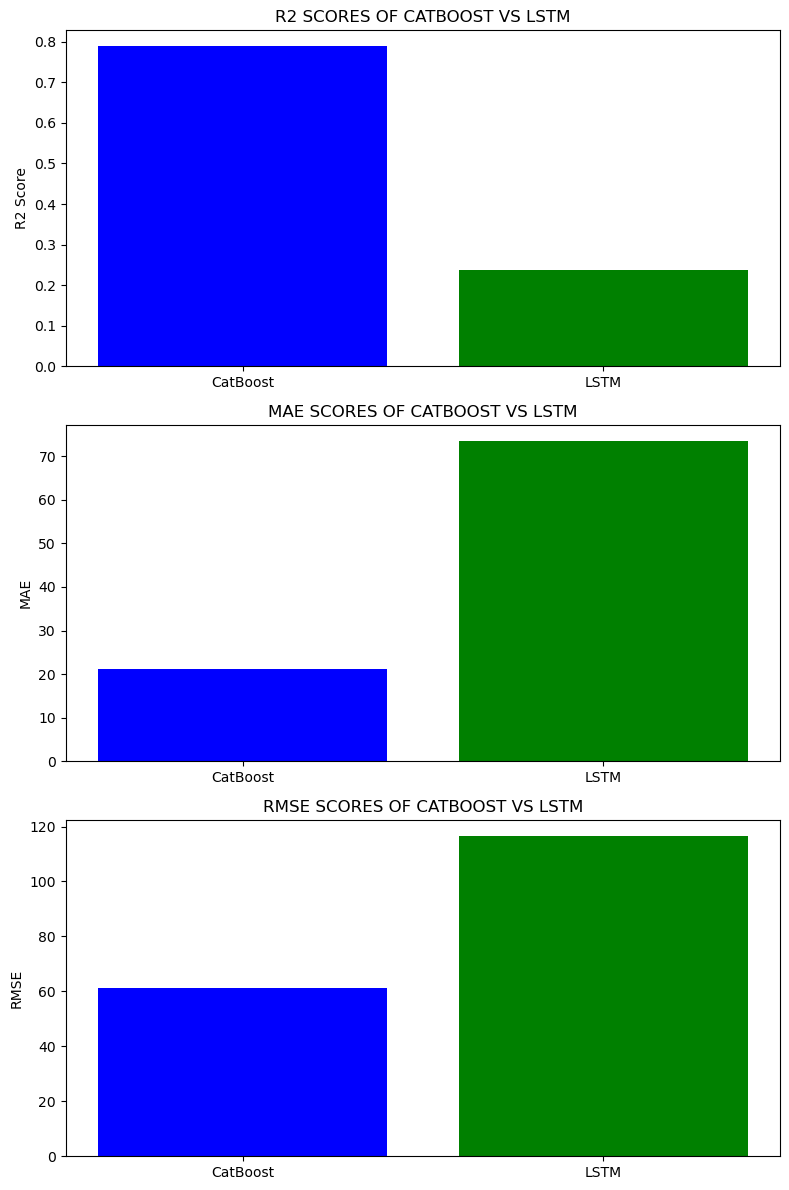

CatBoost model performs better based on R2, MAE, and RMSE scores.


In [30]:
# comparando los modelos CatBoost y LSTM
r2_scores = [catb_r2, lstm_r2]
mae_scores = [catb_mae, lstm_mae]
rmse_scores = [catb_rmse, lstm_rmse]
labels = ['CatBoost', 'LSTM']

fig, axes = plt.subplots(3, 1, figsize=(8, 12))

axes[0].bar(labels, r2_scores, color=['blue', 'green'])
axes[0].set_ylabel('R2 Score')
axes[0].set_title('R2 SCORES OF CATBOOST VS LSTM')

axes[1].bar(labels, mae_scores, color=['blue', 'green'])
axes[1].set_ylabel('MAE')
axes[1].set_title('MAE SCORES OF CATBOOST VS LSTM')

axes[2].bar(labels, rmse_scores, color=['blue', 'green'])
axes[2].set_ylabel('RMSE')
axes[2].set_title('RMSE SCORES OF CATBOOST VS LSTM')

plt.tight_layout()
plt.show()
# analizano el mejor modelo
if catb_r2 > lstm_r2 and catb_mae < lstm_mae and catb_rmse < lstm_rmse:
    print("CatBoost model performs better based on R2, MAE, and RMSE scores.")
else:
    print("LSTM model performs better based on R2, MAE, and RMSE scores.")